In [66]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [67]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import  assess_goodnes_of_cross_match, rayleigh_plot
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import nway_python_api as nway
set_mpl()
%matplotlib inline

matplotlib settings set


In [68]:
nway_all = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_all_candidates.gz_pkl', compression='gzip')


nway_best = nway_all.query('nway_match_flag == 1')

nway_all_dist_only = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_dist_only_all_candidates.gz_pkl', compression='gzip')

nway_best_dist_only = nway_all_dist_only.query('nway_match_flag == 1')

# Proximity of matches to eROSITA sources

### all matches

In [69]:
display(pd.DataFrame(nway_best.groupby(['nway_is_closest', 'nway_is_within_pos_r98']).size()))

0
nway_is_closest nway_is_within_pos_r98      
False           False                    179
                True                    1522
True            False                    416
                True                    7098

### correct matches to validation catalog

In [61]:
correct_id = nway_best.query('desi_id == desi_id_true & ~desi_id_true.isna()')
pd.DataFrame(correct_id.groupby(['nway_is_closest', 'nway_is_within_pos_r98']).size())

0
nway_is_closest nway_is_within_pos_r98     
False           False                     3
                True                     54
True            False                     2
                True                    509

### INcorrect matches to validation catalog

In [62]:
incorrect_id = nway_best.query('desi_id != desi_id_true & ~desi_id_true.isna() & desi_id_true!="hostless"')
pd.DataFrame(incorrect_id.groupby(['nway_is_closest', 'nway_is_within_pos_r98']).size())

0
nway_is_closest nway_is_within_pos_r98    
False           True                     7
True            False                    2
                True                    31

# Completeness/purity analysis (including hostless)

## Best matches  - nnmag

 Completeness = 92% 
 Purity = 92% 
 nway_prob_has_match optimal cutoff =  0.12 
 Fraction of sources with prob_has_match > 0.12 = 89%


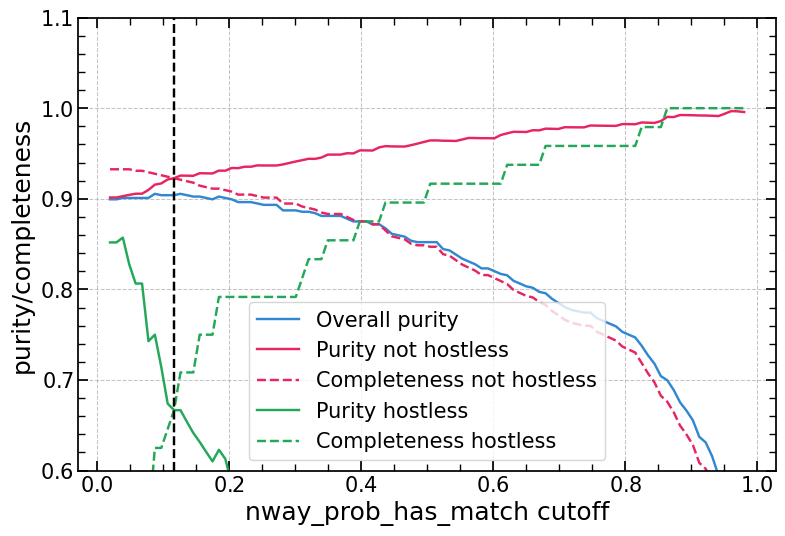

p_any cut: 0.1

                Total validation set: 656
                	 Total hostless: 48
                	 Total not hostless: 608
                Assigned not hostless:
                	 Correct not hostless with correct ctp: 563
                	 Correct not hostless with incorrect ctp: 33
                	 Incorrect not hostless: 18
                Assigned hostless:
                	 Incorrect hostless: 12
                	 Correct hostless: 30

                Overall purity: 0.9039634146341463
                Not hostless purity: 0.9169381107491856
                Not hostless completeness: 0.9259868421052632
                Hostless purity: 0.7142857142857143
                Hostless completeness: 0.625
            


In [44]:
from scripts.cross_match_scripts import  assess_goodnes_of_cross_match

_ = assess_goodnes_of_cross_match(nway_best, p_any_cut=0.1)

## Best matches - nnmag (bright sources)

 Completeness = 98% 
 Purity = 98% 
 nway_prob_has_match optimal cutoff =  0.16 
 Fraction of sources with prob_has_match > 0.16 = 95%


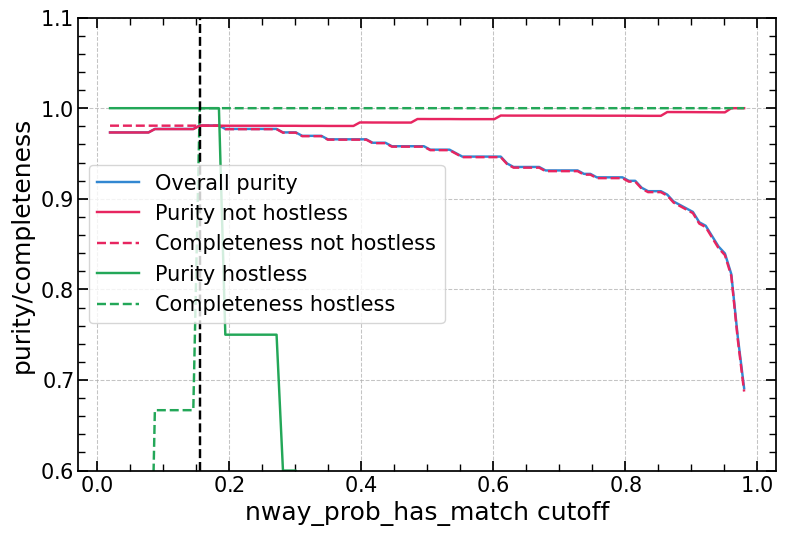

p_any cut: 0.1

                Total validation set: 262
                	 Total hostless: 3
                	 Total not hostless: 259
                Assigned not hostless:
                	 Correct not hostless with correct ctp: 254
                	 Correct not hostless with incorrect ctp: 5
                	 Incorrect not hostless: 1
                Assigned hostless:
                	 Incorrect hostless: 0
                	 Correct hostless: 2

                Overall purity: 0.9770992366412213
                Not hostless purity: 0.9769230769230769
                Not hostless completeness: 0.9806949806949807
                Hostless purity: 1.0
                Hostless completeness: 0.6666666666666666
            


In [42]:
_ = assess_goodnes_of_cross_match(nway_best.query('`flux_05-20`>1e-14'), p_any_cut=0.1)


## Best matches - distance-only

 Completeness = 83% 
 Purity = 83% 
 nway_prob_has_match optimal cutoff =  0.27 
 Fraction of sources with prob_has_match > 0.27 = 90%


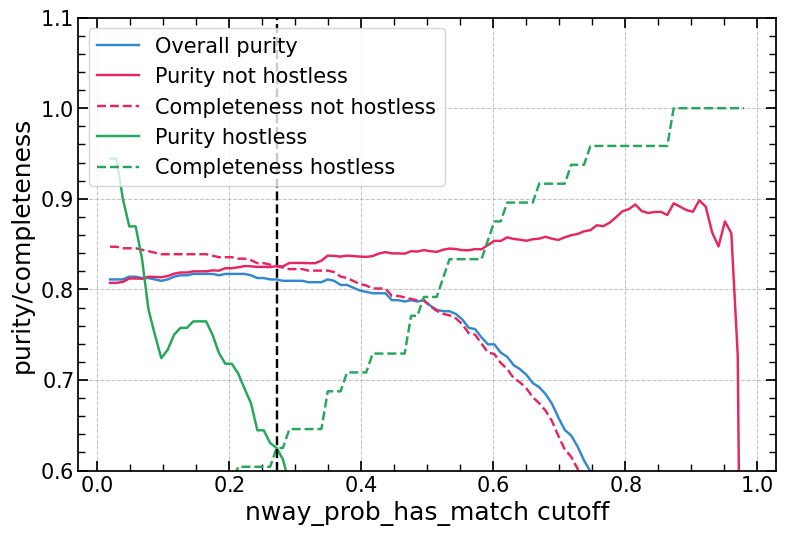

p_any cut: 0.3

                Total validation set: 656
                	 Total hostless: 48
                	 Total not hostless: 608
                Assigned not hostless:
                	 Correct not hostless with correct ctp: 500
                	 Correct not hostless with incorrect ctp: 86
                	 Incorrect not hostless: 17
                Assigned hostless:
                	 Incorrect hostless: 22
                	 Correct hostless: 31

                Overall purity: 0.8094512195121951
                Not hostless purity: 0.8291873963515755
                Not hostless completeness: 0.8223684210526315
                Hostless purity: 0.5849056603773585
                Hostless completeness: 0.6458333333333334
            


In [45]:
_ = assess_goodnes_of_cross_match(nway_best_dist_only, p_any_cut=0.3)


# Distribution of `p_any`

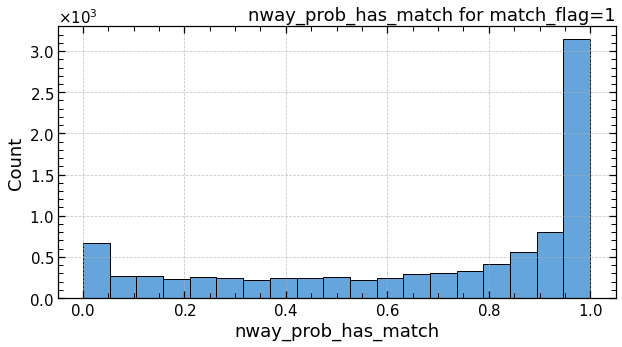

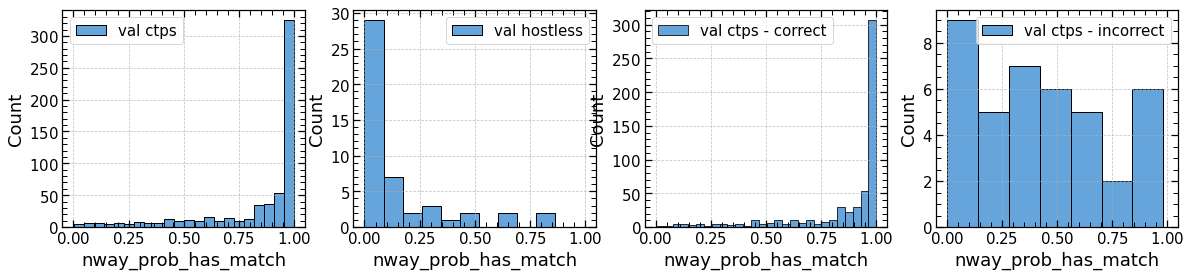

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(nway_best.nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1', loc = 'right')


fig, axs =  plt.subplots(nrows=1, ncols = 4, sharex = True, gridspec_kw = {'hspace':0, 'height_ratios': None}, figsize = (20,4))

sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true!="hostless"').nway_prob_has_match, ax = axs[0], label = 'val ctps')
axs[0].legend()


sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true=="hostless"').nway_prob_has_match, ax = axs[1], label = 'val hostless')
axs[1].legend()


sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true==desi_id & desi_id_true!="hostless"').nway_prob_has_match, ax = axs[2], label = 'val ctps - correct')
axs[2].legend()

sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true!=desi_id & desi_id_true!="hostless"').nway_prob_has_match, ax = axs[3], label = 'val ctps - incorrect')
axs[3].legend()

Text(1.0, 1.0, 'nway_prob_has_match for match_flag=1 and DET_LIKE>15')

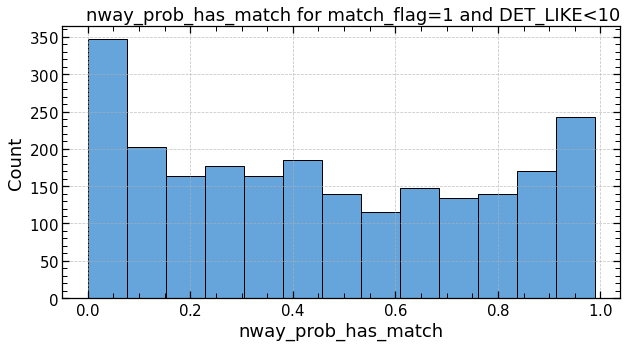

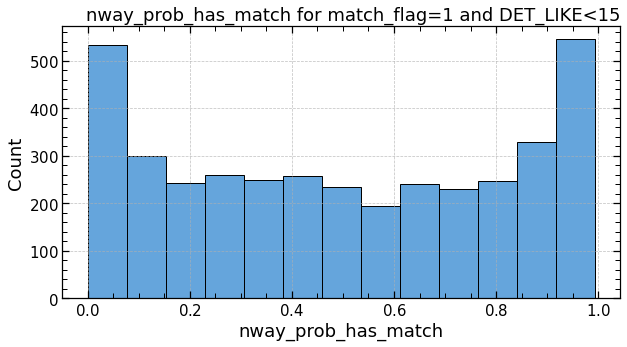

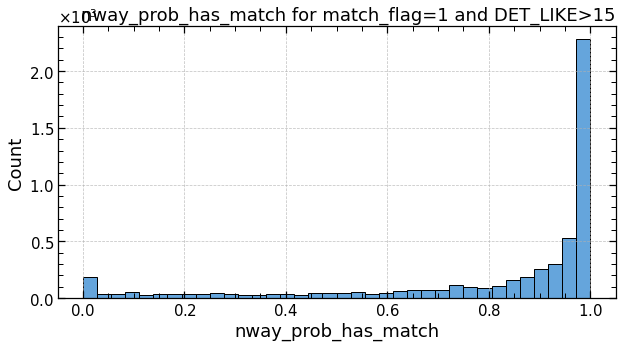

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(nway_best.query('DET_LIKE_0<10').nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1 and DET_LIKE<10', loc = 'right')

plt.figure(figsize=(10,5))
sns.histplot(nway_best.query('DET_LIKE_0<15').nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1 and DET_LIKE<15', loc = 'right')
plt.figure(figsize=(10,5))
sns.histplot(nway_best.query('DET_LIKE_0>15').nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1 and DET_LIKE>15', loc = 'right')


# Offset between secure DESI matches and eROSITA sources

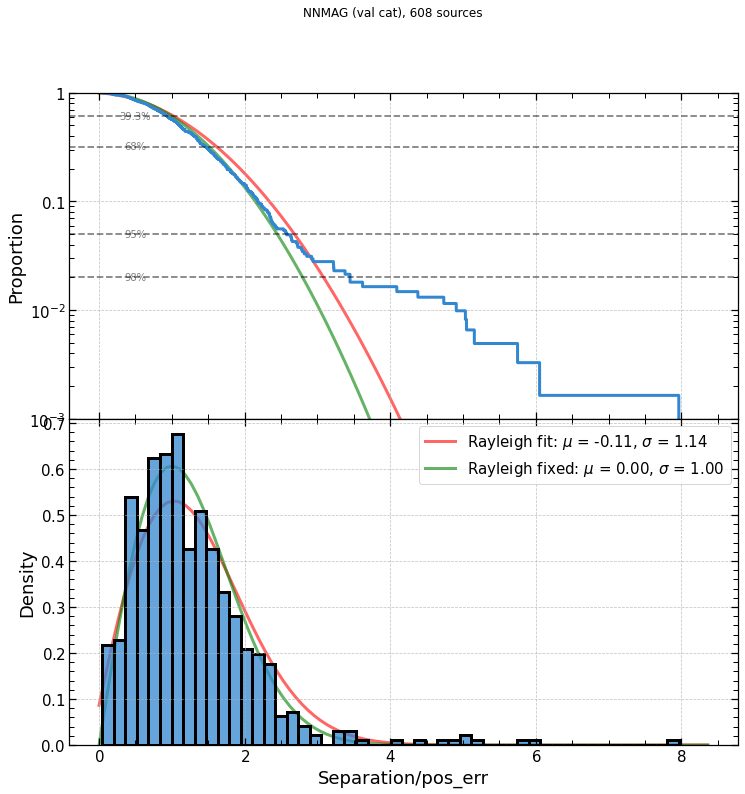

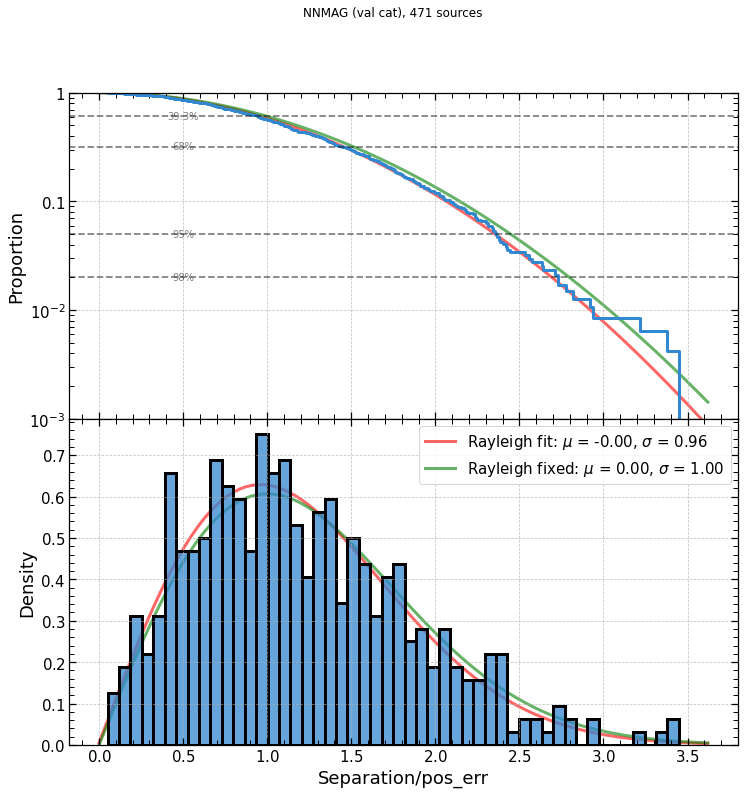

In [57]:

rayleigh_plot(nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless"'), sep_col='nway_Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='NNMAG (val cat)')


rayleigh_plot(nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless" & DET_LIKE_0>15'), sep_col='nway_Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='NNMAG (val cat)')


# Distribution of nnmags

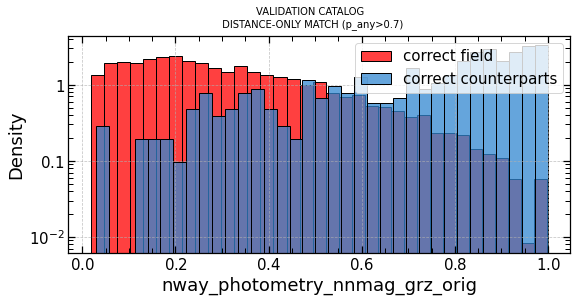

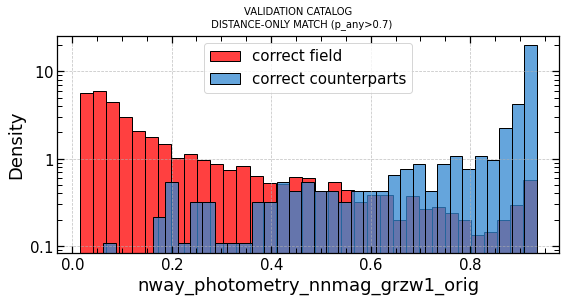

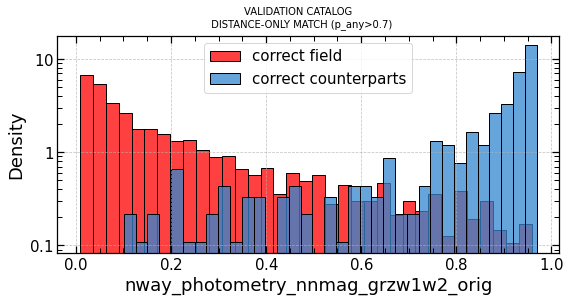

In [83]:
for prior_type in ['grz_orig', 'grzw1_orig', 'grzw1w2_orig']:

    colname = 'nway_photometry_nnmag_'+prior_type
    prob_cutoff = 0.7
    plt.figure(figsize=(9,4))

    sns.histplot(nway_all_dist_only.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==0 & {colname}!=-99. & ~desi_id_true.isnull()")[colname], stat = 'density', color = 'r', bins = 35, label = 'correct field')

    sns.histplot(nway_all_dist_only.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==1 & {colname}!=-99. & desi_id==desi_id_true")[colname], stat = 'density', bins = 35, label = 'correct counterparts')
    plt.suptitle(f'VALIDATION CATALOG \n DISTANCE-ONLY MATCH (p_any>{prob_cutoff})', fontsize = 10)
    plt.yscale('log')
    plt.legend()

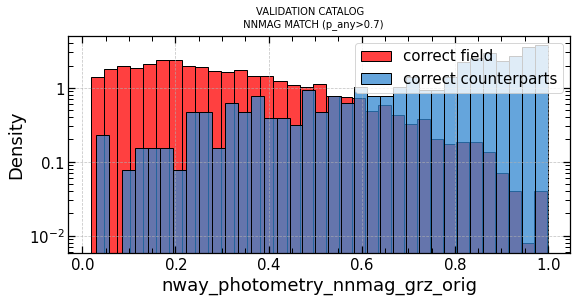

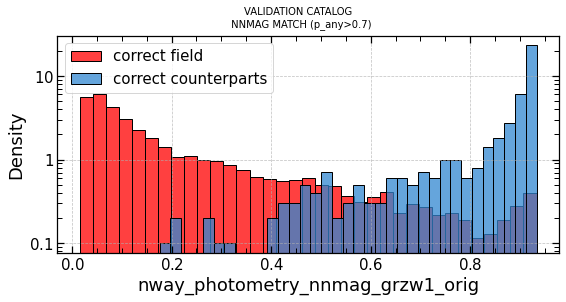

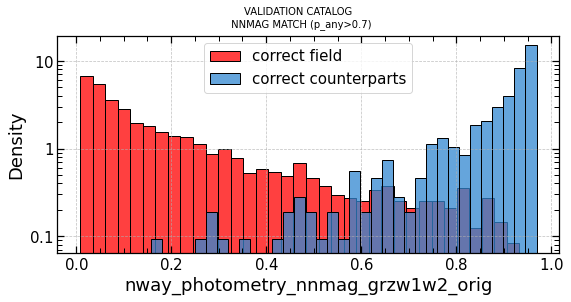

In [84]:
for prior_type in ['grz_orig', 'grzw1_orig', 'grzw1w2_orig']:

    colname = 'nway_photometry_nnmag_'+prior_type
    prob_cutoff = 0.7
    plt.figure(figsize=(9,4))

    sns.histplot(nway_all.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==0 & {colname}!=-99. & ~desi_id_true.isnull()")[colname], stat = 'density', color = 'r', bins = 35, label = 'correct field')

    sns.histplot(nway_all.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==1 & {colname}!=-99. & desi_id==desi_id_true")[colname], stat = 'density', bins = 35, label = 'correct counterparts')
    plt.suptitle(f'VALIDATION CATALOG \n NNMAG MATCH (p_any>{prob_cutoff})', fontsize = 10)
    plt.yscale('log')
    plt.legend()

# Missing data

fraction of missed measurements per filter, in per cent - All candidates within 30":
desi_rel_dered_mag_g     17.5
desi_rel_dered_mag_r     11.5
desi_rel_dered_mag_z      6.5
desi_rel_dered_mag_w1    33.6
desi_rel_dered_mag_w2    55.2
desi_rel_dered_mag_w3    92.8
desi_rel_dered_mag_w4    88.1
dtype: float64
fraction of missed measurements per filter, in per cent - best matches:
desi_rel_dered_mag_g      6.8
desi_rel_dered_mag_r      4.6
desi_rel_dered_mag_z      1.9
desi_rel_dered_mag_w1     6.7
desi_rel_dered_mag_w2    12.2
desi_rel_dered_mag_w3    72.1
desi_rel_dered_mag_w4    81.1
dtype: float64
fraction of missed measurements per filter, in per cent - best matches within r98
desi_rel_dered_mag_g      6.5
desi_rel_dered_mag_r      4.3
desi_rel_dered_mag_z      1.7
desi_rel_dered_mag_w1     6.0
desi_rel_dered_mag_w2    10.8
desi_rel_dered_mag_w3    71.5
desi_rel_dered_mag_w4    80.6
dtype: float64
best-matches sources with all grz missing:  17


<AxesSubplot:>

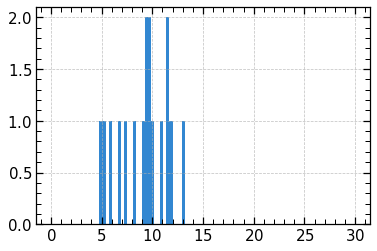

In [72]:
cols = ['desi_rel_dered_mag_g', 'desi_rel_dered_mag_r', 'desi_rel_dered_mag_z', 'desi_rel_dered_mag_w1', 'desi_rel_dered_mag_w2', 'desi_rel_dered_mag_w3', 'desi_rel_dered_mag_w4']
print('fraction of missed measurements per filter, in per cent - All candidates within 30":')
print(nway_all[cols].agg(lambda x: np.round(100*np.mean(np.isnan(x)),1)))
print('fraction of missed measurements per filter, in per cent - best matches:')
print(nway_best[cols].agg(lambda x: np.round(100*np.mean(np.isnan(x)),1)))

print('fraction of missed measurements per filter, in per cent - best matches within r98')
print(nway_best.query('nway_Separation_EROSITA_DESI<pos_r98 ')[cols].agg(lambda x: np.round(100*np.mean(np.isnan(x)),1)))



n_grz_missing_best_matches = len(nway_best.query('desi_rel_dered_mag_g.isna() & desi_rel_dered_mag_r.isna() & desi_rel_dered_mag_z.isna()'))
print('best-matches sources with all grz missing: ', n_grz_missing_best_matches)

nway_best.query('desi_rel_dered_mag_g.isna() & desi_rel_dered_mag_r.isna() & desi_rel_dered_mag_z.isna()').desi_dered_mag_g.hist(bins=100, range=(0, 30), label='g missing')